# Midway Meeting DEMO

### Description
This notebook demonstrates a simple experiment for analyzing quantum noises.<br>
In the experiment, we will run a simple circuit on the _qasm simulator_ with different noise parameters (_pauli_).

##### Circuit Description
The circuit we will use contains 3 qubits and on each qubit an _id_ gate is placed.
![title](images/3id_circuit.png)

##### Specifics
Let $\rho_0$ be the density matrix from running the circuit without any noises - noise_params = [0,0,0].<br>
For each $0 \leq p \leq 1$:<br>
Let $\rho_x$ be the density matrix from running the circuit with noise_params = [p,0,0].<br>
Let $\rho_y$ be the density matrix from running the circuit with noise_params = [0,p,0].<br>
Let $\rho_z$ be the density matrix from running the circuit with noise_params = [0,0,p].<br>

For each $0 \leq p \leq \frac{1}{3}$:<br>
Let $\rho_{xyz}$ be the density matrix from running the circuit with noise_params = [p,p,p].<br>

The experiment will provide a graph which shows the Frobenius norm of $\rho(p) - \rho_0$

Where Frobenius norm is defined as: $||A||_F = \sqrt{\sum{|a_{ij}|^2}}$

###### First lets import what we need

In [1]:
import sys
import numpy as np
sys.path.append("../")
import qiskit.backends.local.qasm_simulator_cpp as qs
SIM_EXECUTABLE = '../out/src/qasm-simulator-cpp/qasm_simulator_cpp'

def extract_density_matrix(sim_output):
    return sim_output['result'][0]['data']['snapshots']['0']['density_matrix']


def frobenius(density_matrix):
    return np.linalg.norm(density_matrix)

###### qobj definition

In [2]:
qobj = {
  "id": "first_try",
  "config": {
      "data": ["density_matrix"],
      "noise_params": {
        "id": {"p_pauli": [0, 0, 0]}
      },
      "shots": 1024,
      "seed": 35
  },
  "circuits": [
    {
      "compiled_circuit": {
        "header": {
                    "clbit_labels": [],
                    "number_of_clbits": 0,
                    "number_of_qubits": 3,
                    "qubit_labels": [["q", 0], ["q", 1], ["q", 2]]
                },
        "operations": [
                    {"name": "id", "qubits": [0]},
                    {"name": "id", "qubits": [1]},
                    {"name": "id", "qubits": [2]},
                    {"name": "snapshot", "params": [0]}
                ]
      }
    }
  ]
}

###### Calculate $\rho_0$

In [3]:
zero_noise_matrix = extract_density_matrix(qs.run(qobj, SIM_EXECUTABLE))

###### Run the experiment

In [4]:
x_noises = []
y_noises = []
z_noises = []
single_axis_noise_params = np.linspace(0, 1, num=100, dtype=float)
for p in single_axis_noise_params:
    # run circuit with noises on x axis
    qobj['config']['noise_params']['id']['p_pauli'] = [p, 0, 0]
    x_noises.append(frobenius(extract_density_matrix(qs.run(qobj, SIM_EXECUTABLE)) - zero_noise_matrix))
    
    # run circuit with noises on y axis
    qobj['config']['noise_params']['id']['p_pauli'] = [0, p, 0]
    y_noises.append(frobenius(extract_density_matrix(qs.run(qobj, SIM_EXECUTABLE)) - zero_noise_matrix))
    
    # run circuit with noises on z axis
    qobj['config']['noise_params']['id']['p_pauli'] = [0, 0, p]
    z_noises.append(frobenius(extract_density_matrix(qs.run(qobj, SIM_EXECUTABLE)) - zero_noise_matrix))

xyz_noises = []
all_axises_noise_params = np.linspace(0, 1/3, num=100, dtype=float)
for p in all_axises_noise_params:
    # run circuit with noises on all axises
    qobj['config']['noise_params']['id']['p_pauli'] = [p, p, p]
    xyz_noises.append(frobenius(extract_density_matrix(qs.run(qobj, SIM_EXECUTABLE)) - zero_noise_matrix))
    

###### Plot the graph 

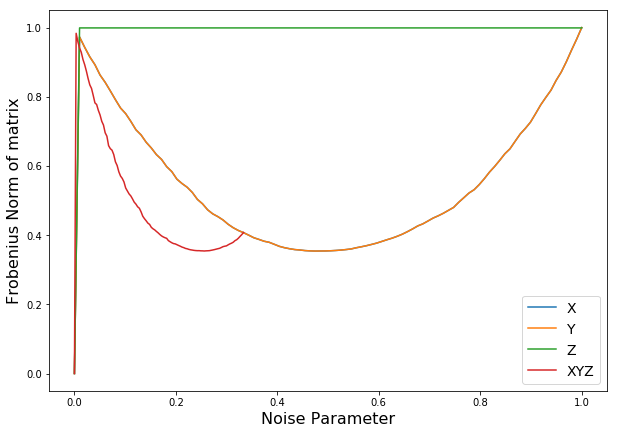

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(single_axis_noise_params, x_noises)
plt.plot(single_axis_noise_params, y_noises)
plt.plot(single_axis_noise_params, z_noises)
plt.plot(all_axises_noise_params, xyz_noises)

plt.legend(['X', 'Y', 'Z', 'XYZ'], loc='best', prop={'size': 14})
plt.xlabel('Noise Parameter', fontsize=16)
plt.ylabel('Frobenius Norm of matrix', fontsize=16)
pass